## Bayesian inference via posterior sampling
First we will need to wrap Chempy such that it internally produces priors and likelihoods, and returns a posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Loading the default parameters

from Chempy.parameter import ModelParameters
a = ModelParameters()

## Chempy posterior with prior and with best-fit from paper
- First we will initialise Chempy with its prior parameters and evaluate the Posterior for Sun+ observational constraint.
- Then we initilise Chempy with the best parameters obtained from the MCMC (Figure 11 of the paper)

[-2.29 -2.75 -0.8  -0.3   3.5   0.5   0.3 ]


/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/making_abundances.py:34: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.log10(cube_abundances[item]) + 12.
/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:534: RuntimeWarning: divide by zero encountered in log10
  plt.plot(gas_reservoir['time'],np.log10(gas_reservoir['Z']/solZ),label = "Z_gas_reservoir %.4f" %(np.log10(gas_reservoir['Z'][-1]/solZ)))
/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:543: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cube['time'],np.log10(cube['Z']/solZ),label = "Z_gas %.4f" %(np.log10(cube['Z'][-1]/solZ)))


l:  -198.767357212 pr:  0.0 po:  -198.767357212


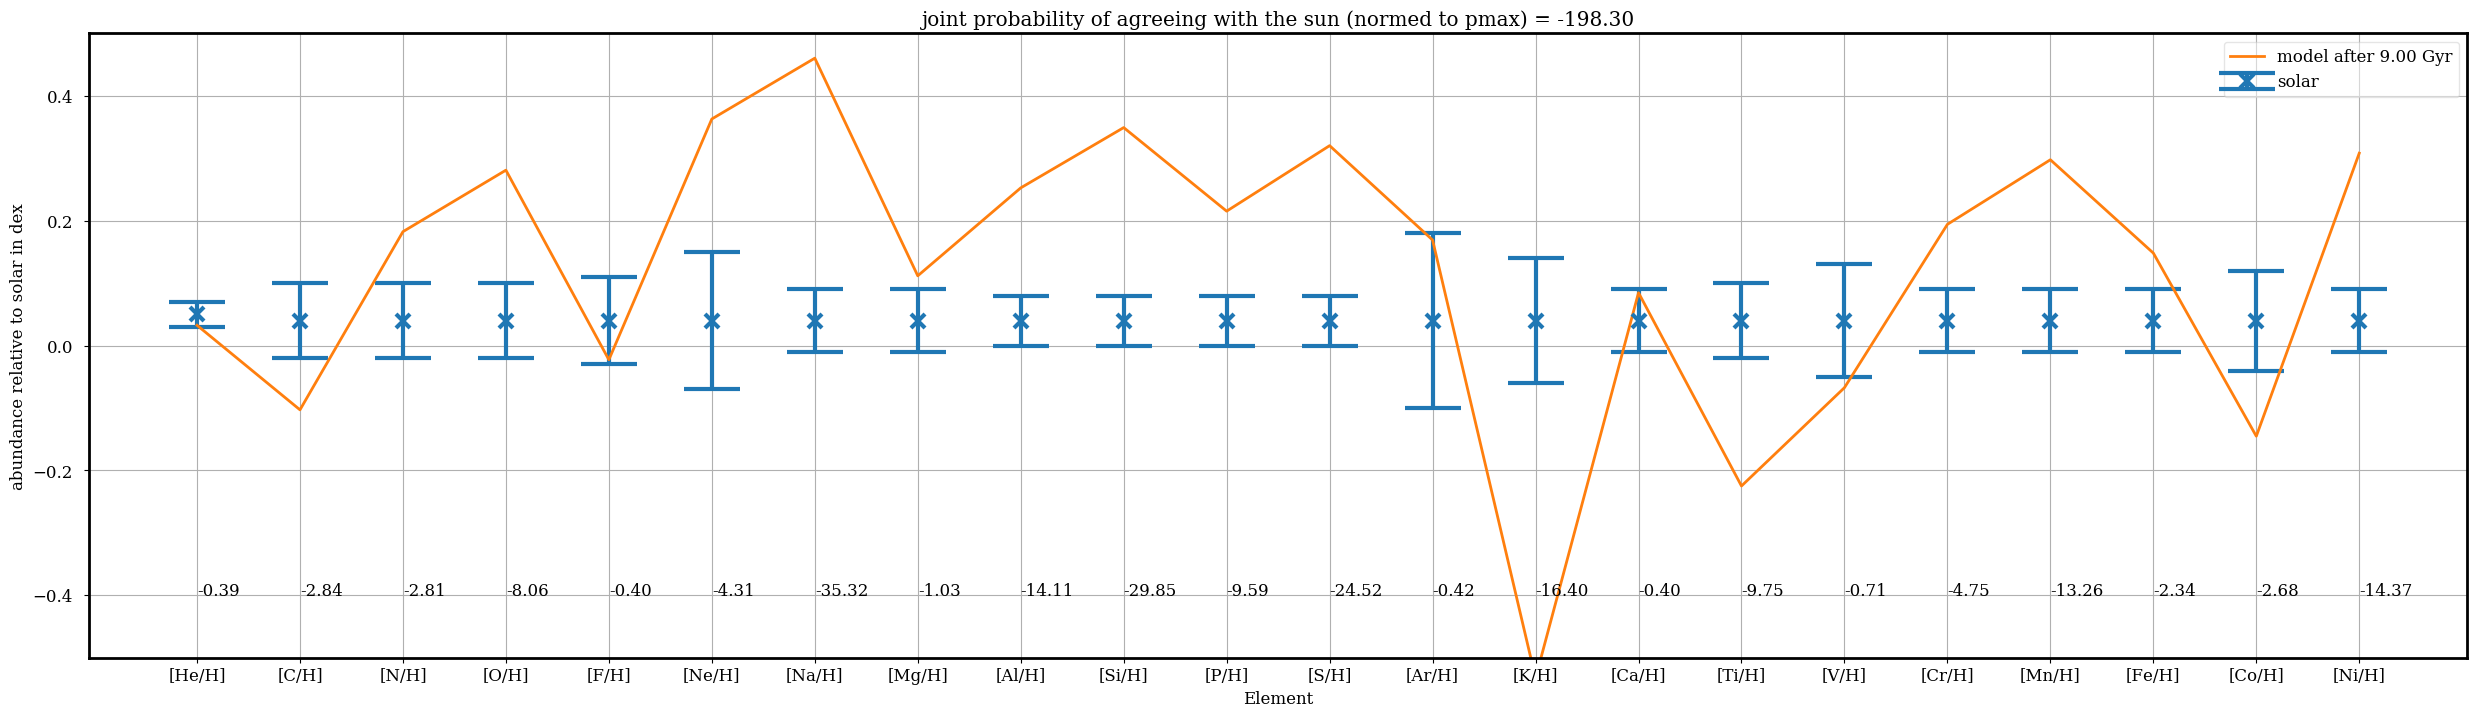

In [3]:
# Evaluating the Chempy posterior at the maximum prior parameters

from Chempy.cem_function import cem
a.testing_output = True
a.summary_pdf = True
a.observational_constraints_index = ['gas_reservoir','sn_ratio','sol_norm']
posterior, blobs = cem(a.p0,a)

[-2.46 -3.07 -0.8  -0.31  3.02  0.47 -0.11]


/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/making_abundances.py:34: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.log10(cube_abundances[item]) + 12.
/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:534: RuntimeWarning: divide by zero encountered in log10
  plt.plot(gas_reservoir['time'],np.log10(gas_reservoir['Z']/solZ),label = "Z_gas_reservoir %.4f" %(np.log10(gas_reservoir['Z'][-1]/solZ)))
/home/jan/anaconda3/lib/python3.6/site-packages/Chempy-0.1-py3.6.egg/Chempy/data_to_test.py:543: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cube['time'],np.log10(cube['Z']/solZ),label = "Z_gas %.4f" %(np.log10(cube['Z'][-1]/solZ)))


model_temp/  already exists. Content might be overwritten
l:  -104.594642542 pr:  -1.92703333333 po:  -106.521675875


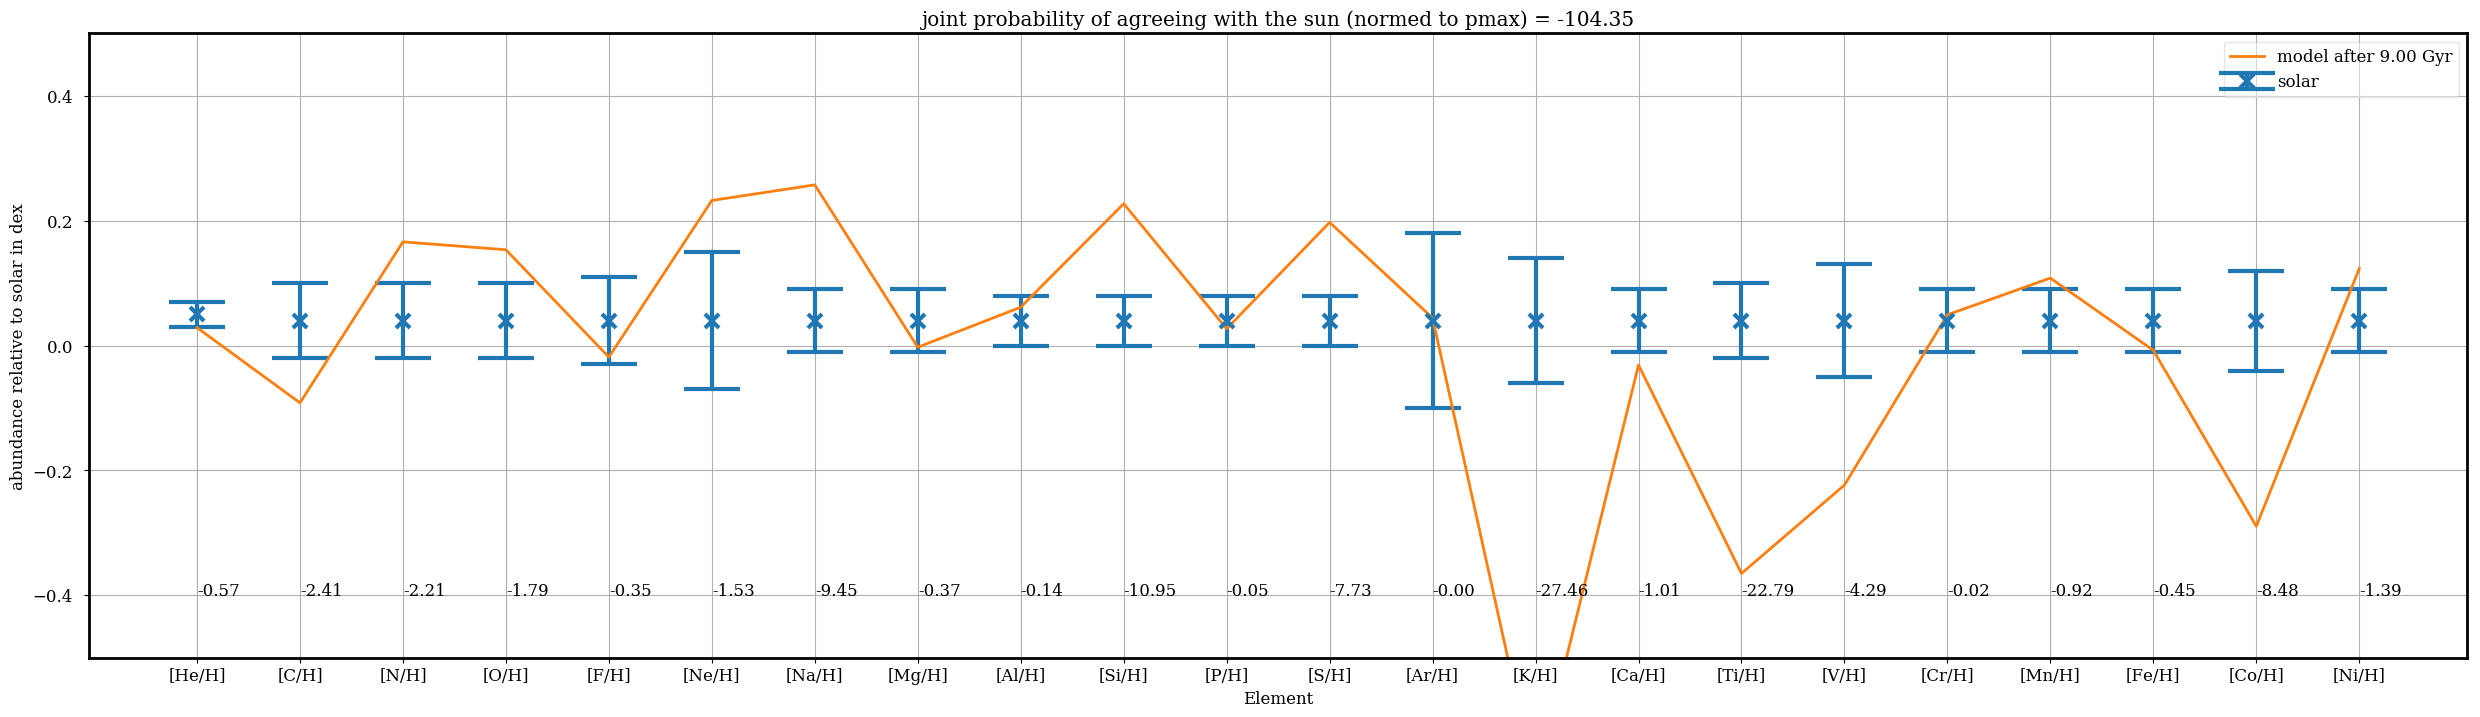

In [4]:
# Evaluating Chempy at the median posterior parameter values taken from the paper

a.p0 = np.array([-2.46, -3.07, -0.8, -0.31, 3.02, 0.47, -0.11])
posterior, blobs = cem(a.p0,a)

## MCMC workflow
A full MCMC sampling of the 7 dimensional parameter space of the paper takes too long for this tutorial. For now we do a small inference for only two parameters, high-mass slope of the IMF and number of SN Ia. This would have to run for about 30 minutes. You can uncomment *mcmc(a)* or you can just use the chain that is already saved to the github repository. All the results from this method will be stored in the folder *source/mcmc/0/*, where you can also inspect some convergence plots.
You can run an MCMC for any Chempy parameter, you just need to define limits and a prior for each parameter in *parameter.py*.

In [5]:
# Convenience function for the MCMC

from Chempy.wrapper import mcmc
a.nwalkers = 8
a.ndim = 2
a.to_optimize = np.array(['high_mass_slope', 'log10_N_0'])
a.p0 = np.array([-2.29 ,-2.75])
#mcmc(a) 
# The code gives out the parameters and likelihoods for each single evaluation. 
# Also after each MCMC step the mean posterior value is shown.
# It will stop once the mean posterior stayed the same for 200 iterations.
# An example chain is already in the folder. Otherwise it takes about 30 minutes to run this chain on a laptop
# There is room for improvement: first minimizing to the 'global' maximum posterior and then sampling the PDF there with the MCMC.
# The algorithm loads the yield tables anew each time. They could be stored for the purpose of sampling instead.

In [6]:
# This function shows MCMC convergence plots and restructures the chain (flattens it and throws out burn-in)

from Chempy.plot_mcmc import restructure_chain
parameter_names = [r'$\alpha_\mathrm{IMF}$',r'$\log_{10}\left(\mathrm{N}_\mathrm{Ia}\right)$']
restructure_chain('mcmc/', parameter_names)

You have no mcmc folder. Copying the example from the Chempy folder.
The chain has a length of 305 iterations, each iteration having 8 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-110.657428619 -229.821645076
Mean posteriors after the burn-in tail is cut out:
-110.657428619 -110.344962789
We are left with a sample of 496 posterior evaluations from the converged MCMC chain
We have 496 iterations good enough posterior, their posteriors range from
-109.671769624 -115.89082297
Highest posterior was obtained at parameters:  [[-2.38977345 -2.93490073]]
Number of unique posterior values:  371
Inferred marginalized parameter distributions are:
$\alpha_\mathrm{IMF}$ -2.38797626005 +- 0.00859702152841
$\log_{10}\left(\mathrm{N}_\mathrm{Ia}\right)$ -2.94233065359 +- 0.0342257568884


## Plotting the posterior PDF
I have a plotting routine which can plot the corner plot of the Posterior distribution and for comparison also plots the Prior distribution in the histograms as well as the 3sigma contour line in the 2d plot. Then we can inspect how much the data (Solar abundances + SN-ratio + Corona metallicity) narrows the parameter constraints.

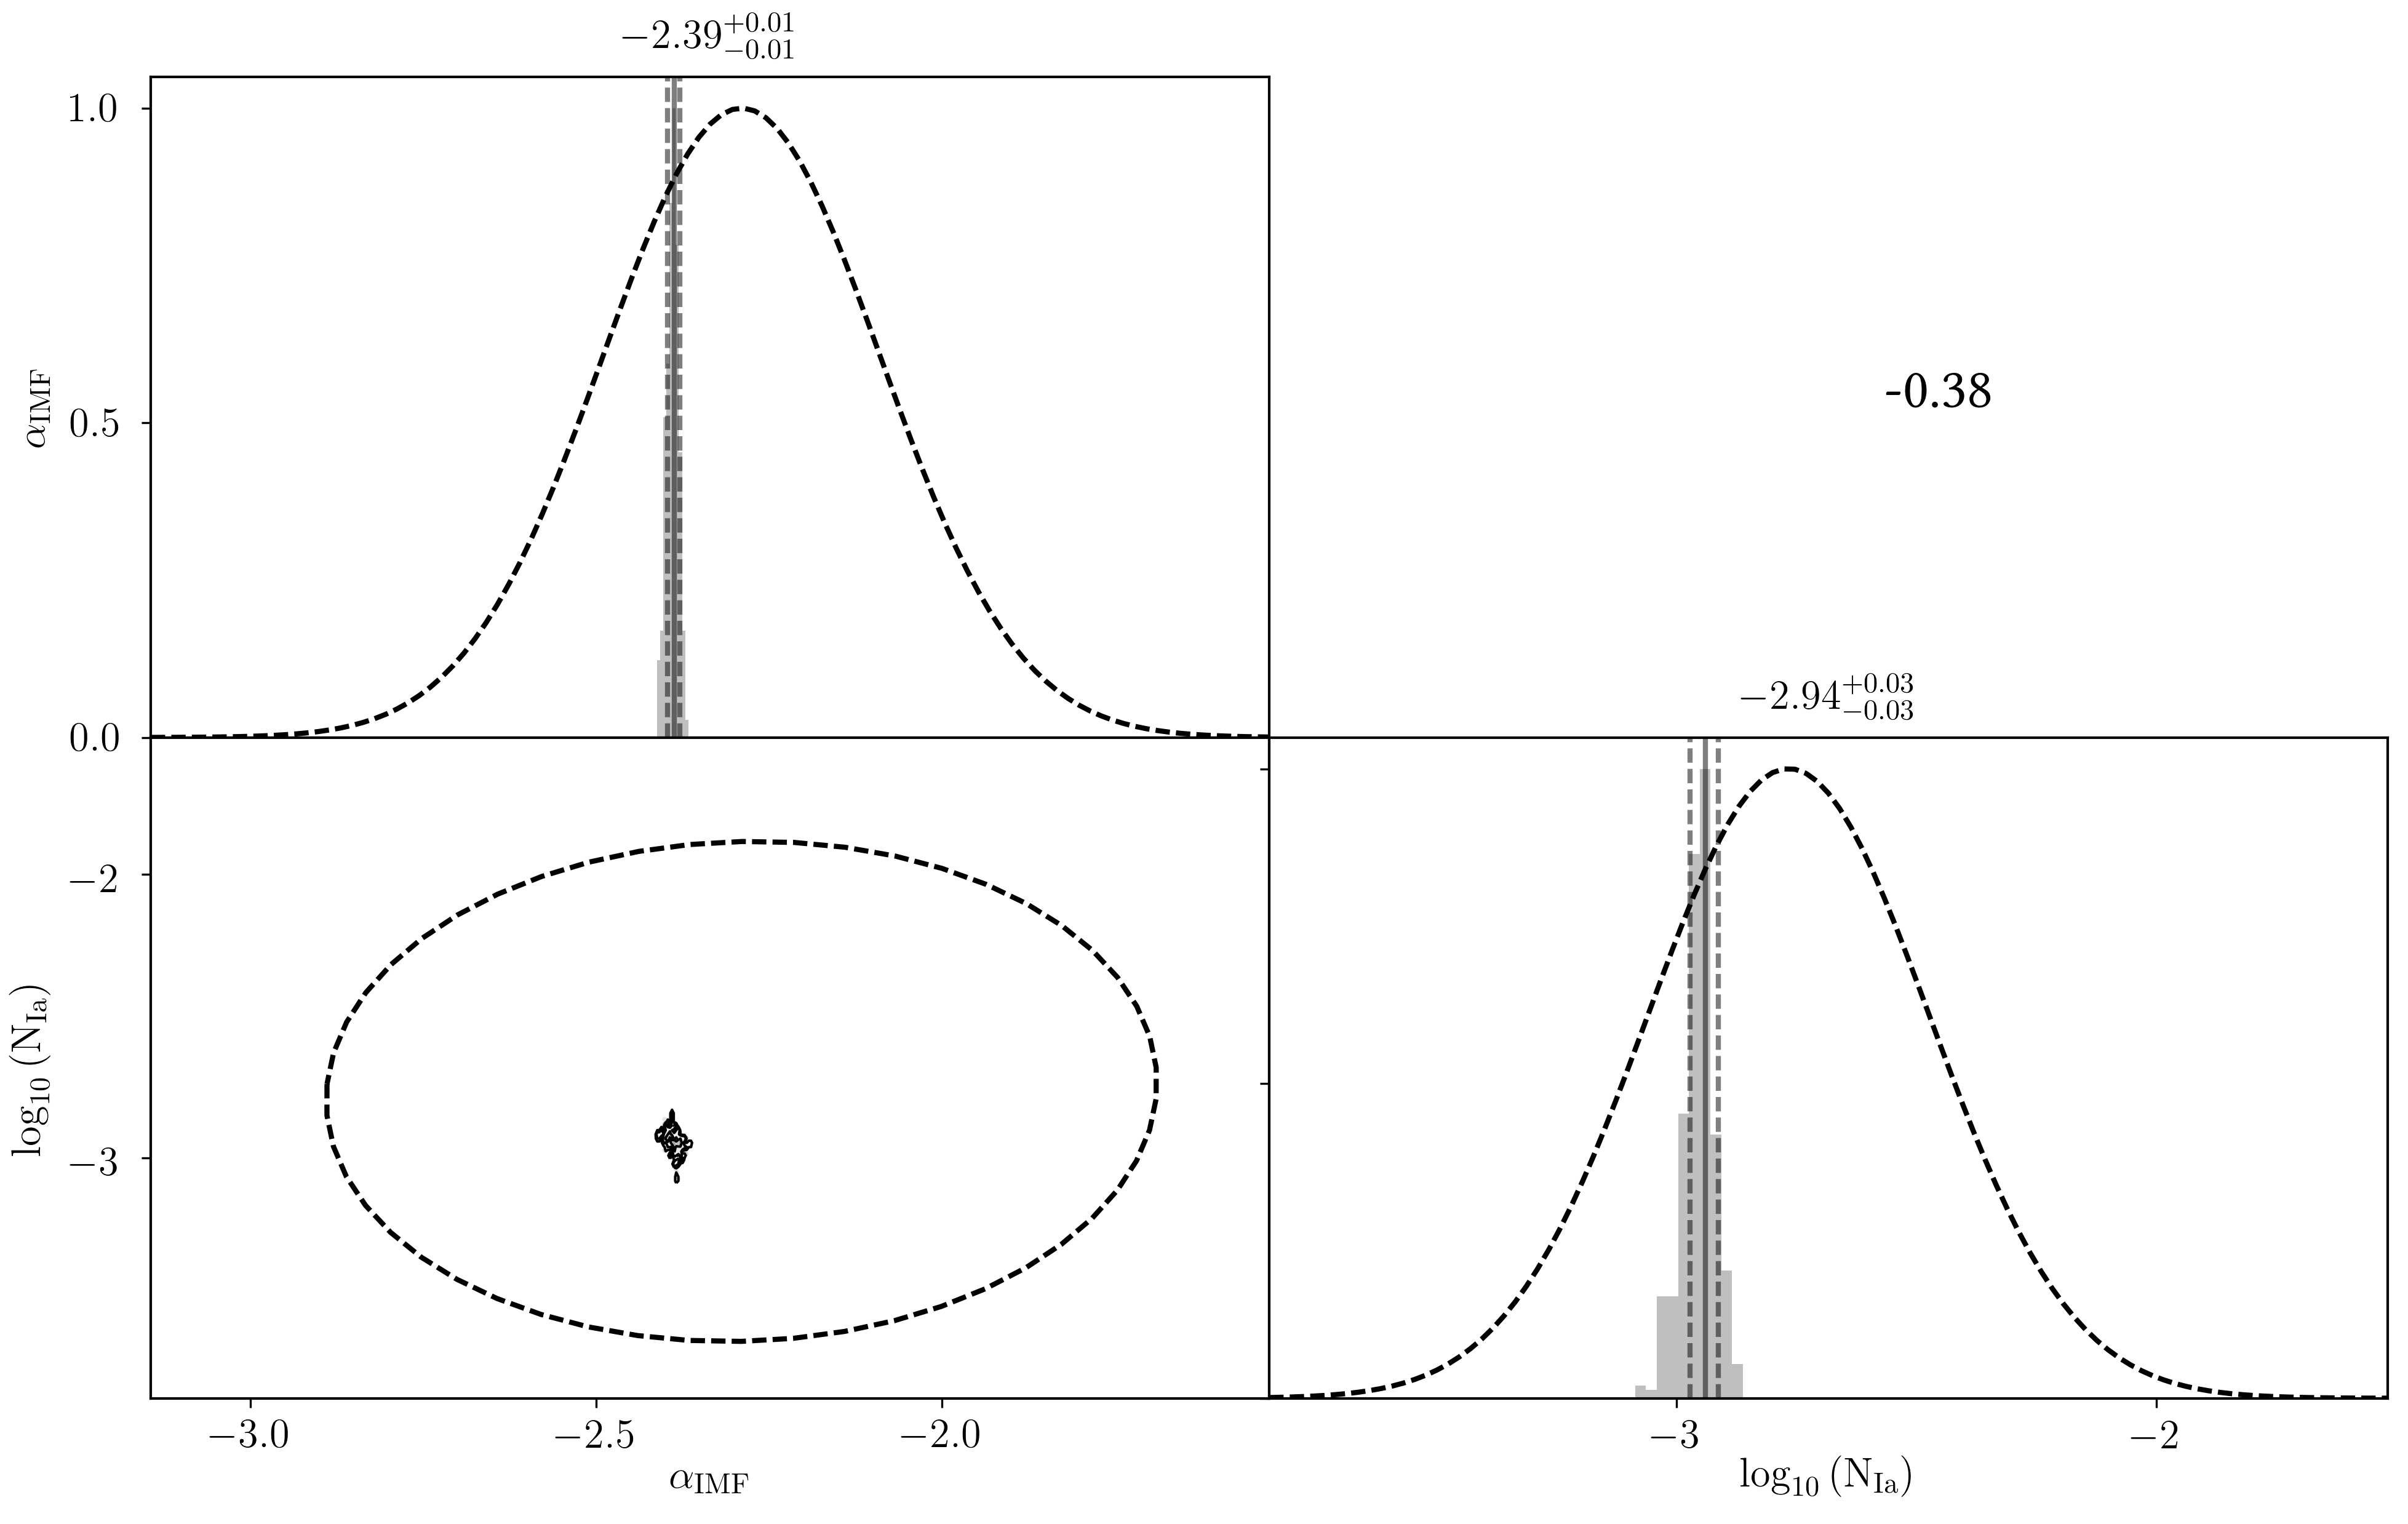

In [7]:
# Corner plot of the posterior distribution in comparison to the Prior

from Chempy.plot_mcmc import plot_mcmc_chain
plot_mcmc_chain('mcmc/', use_scale = True)

Interestingly the correlation here is negative, whereas in the paper the correlation is positive. The reason for negative correlation here is: the more yield from CC-SN are coming the less is needed from SN Ia and vice versa. In the paper, where we have more parameters they are positively correlated because the alpha elements (from CC-SNe) and the iron-peak elements (mainly from SN Ia) try to reach a similar plateau (at solar abundances). Their overproduction is then counterbalanced by a higher outflow fraction or later SFR peak. This is not possible when only using these two parameters. Hence we have an anti-correlation here. 

## Correlations with predictions and posterior
How do these parameters correlate with the predicted elements and with the posterior. We try to plot this next (the code is buggy and you will need to provide the name_list if you want to use your own example).

['v-posterior', 'm-O', 'm-Mg', 'm-Si', 'm-Fe', 'm-SN-ratio', "v-b'high_mass_slope'", "v-b'log10_N_0'"]


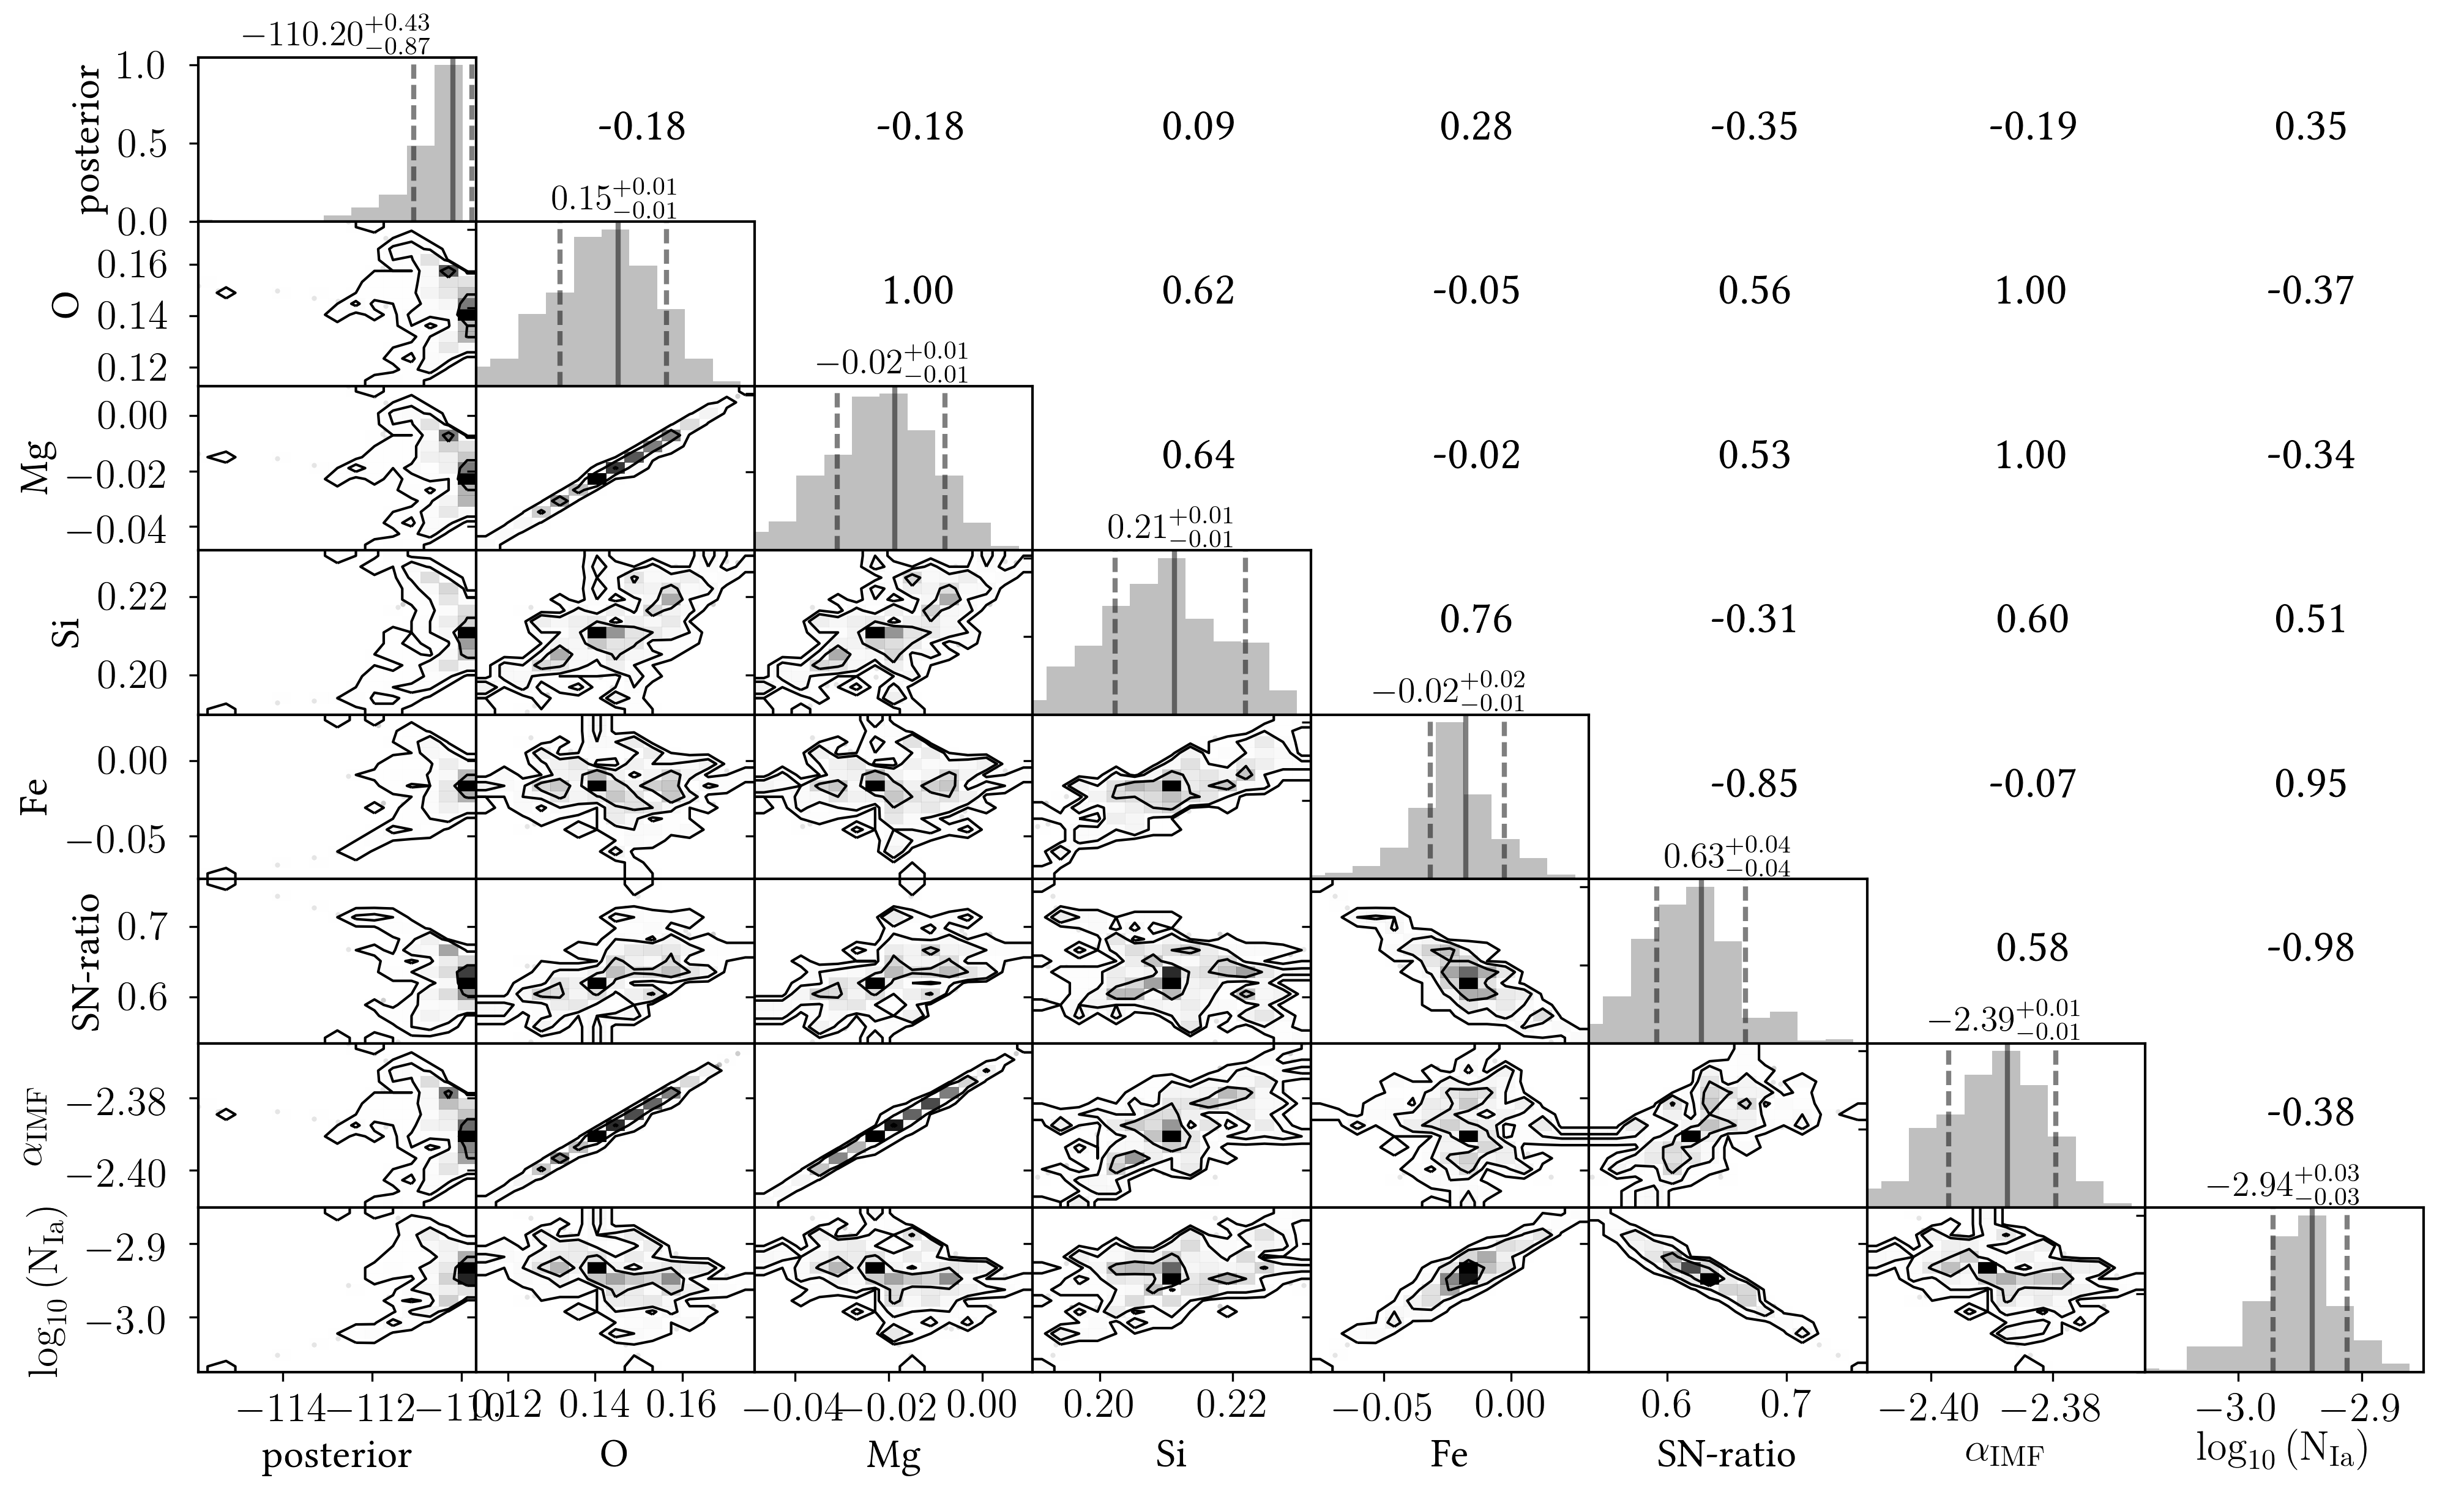

In [8]:
# Corner plot over parameters, predicted elemental abundances, posterior and predicted SN-ratio.

from Chempy.plot_mcmc import plot_element_correlation
plot_element_correlation('mcmc/')

We see that Mg and O are perfectly aligned. Showing that one of the elements is completely redundant (at least when only inferring the high-mass slope of the IMF and SN Ia normalisation). Iron is not strongly correlated with the high-mass-slope, but with the Incidence of SN Ia. We also see that the SN-ratio is strongly correlated with the number of SN Ia. The posterior looks symmetric over parameters and predictions. This plot can help to identify redundant elements.